In [2]:
import torch
import torchvision
from torchvision import transforms as T
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow

In [3]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained = True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:01<00:00, 147MB/s]


In [4]:
model.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [5]:
!wget 'http://images.cocodataset.org/test2017/000000308929.jpg'

--2023-12-16 15:14:18--  http://images.cocodataset.org/test2017/000000308929.jpg
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.57.105, 3.5.25.56, 54.231.169.201, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.57.105|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 112686 (110K) [image/jpeg]
Saving to: ‘000000308929.jpg’

000000308929.jpg    100%[===================>] 110.04K  --.-KB/s    in 0.09s   

2023-12-16 15:14:18 (1.25 MB/s) - ‘000000308929.jpg’ saved [112686/112686]



In [6]:
ig = Image.open('/content/000000308929.jpg')

In [7]:
transform = T.ToTensor()
img = transform(ig)

In [8]:
with torch.no_grad():
  pred = model([img])

In [9]:
pred

[{'boxes': tensor([[  0.0000, 240.9959, 172.5810, 639.9999],
          [310.0422, 323.6831, 344.1323, 382.8402],
          [374.5042, 344.8940, 416.0659, 426.5892],
          [348.9993, 467.5756, 421.4017, 624.1740],
          [412.4503, 331.0647, 424.4992, 422.0959],
          [ 12.7617,  14.2740, 415.3959, 639.9999],
          [350.0179, 353.7484, 379.3167, 423.0991],
          [350.7241, 194.5064, 380.7180, 207.9037],
          [ 50.5952, 445.9142, 297.4995, 603.5831],
          [  1.7614, 250.1677,  99.4773, 562.9583],
          [ 11.7971, 423.7350, 177.0517, 639.9081],
          [121.8093, 136.4534, 206.1755, 165.1749],
          [237.4120, 202.7852, 263.9636, 230.7612],
          [173.8241, 248.2755, 209.8967, 265.4471],
          [373.1301, 242.6553, 385.7334, 269.9772],
          [312.1191, 256.4874, 424.5030, 386.8617],
          [395.7188, 213.8806, 423.1189, 230.6534],
          [338.6931, 504.9771, 356.0994, 624.1872],
          [ 60.9154, 366.9051,  83.4909, 388.8215],
   

In [10]:
bboxes, labels, scores = pred[0]["boxes"], pred[0]["labels"], pred[0]["scores"]

In [11]:
num = torch.argwhere(scores > 0.8).shape[0]
num

7

In [12]:
coco_names = ["person" , "bicycle" , "car" , "motorcycle" , "airplane" , "bus" , "train" , "truck" , "boat" , "traffic light" , "fire hydrant" , "street sign" , "stop sign" , "parking meter" , "bench" , "bird" , "cat" , "dog" , "horse" , "sheep" , "cow" , "elephant" , "bear" , "zebra" , "giraffe" , "hat" , "backpack" , "umbrella" , "shoe" , "eye glasses" , "handbag" , "tie" , "suitcase" ,
"frisbee" , "skis" , "snowboard" , "sports ball" , "kite" , "baseball bat" ,
"baseball glove" , "skateboard" , "surfboard" , "tennis racket" , "bottle" ,
"plate" , "wine glass" , "cup" , "fork" , "knife" , "spoon" , "bowl" ,
"banana" , "apple" , "sandwich" , "orange" , "broccoli" , "carrot" , "hot dog" ,
"pizza" , "donut" , "cake" , "chair" , "couch" , "potted plant" , "bed" ,
"mirror" , "dining table" , "window" , "desk" , "toilet" , "door" , "tv" ,
"laptop" , "mouse" , "remote" , "keyboard" , "cell phone" , "microwave" ,
"oven" , "toaster" , "sink" , "refrigerator" , "blender" , "book" ,
"clock" , "vase" , "scissors" , "teddy bear" , "hair drier" , "toothbrush" , "hair brush"]

In [13]:
font = cv2.FONT_HERSHEY_SIMPLEX

In [14]:
igg = cv2.imread('/content/000000308929.jpg')
for i in range(num):
  x1, y1, x2, y2 = bboxes[i].numpy().astype('int')
  class_name = coco_names[labels.numpy()[i]-1]
  igg = cv2.rectangle(igg,(x1, y1),(x2, y2), (0,255,0),1)
  igg = cv2.putText(igg, class_name, (x1,y1-10), font, 0.5, (255,0,0), 1, cv2.LINE_AA)


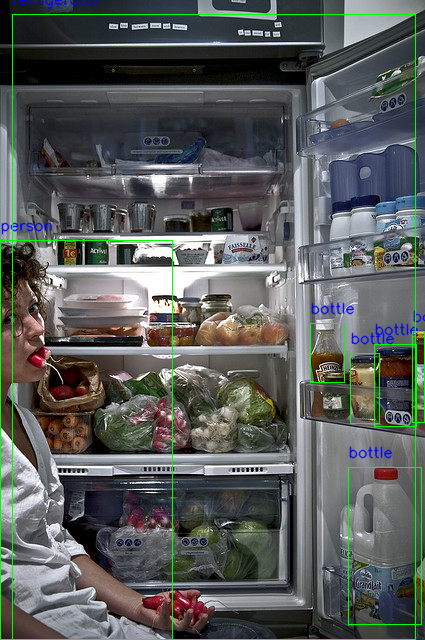

In [15]:
cv2_imshow(igg)

In [26]:
quantized_model = torch.quantization.quantize_dynamic(model, {torch.nn.Conv2d, torch.nn.Linear},  dtype=torch.qint8)

In [27]:
with torch.no_grad():
  pred = quantized_model([img])

In [28]:
pred

[{'boxes': tensor([[  0.0000, 241.7243, 171.2536, 639.9999],
          [310.0762, 323.7516, 344.2761, 382.7973],
          [374.4859, 345.0412, 416.1059, 426.5108],
          [412.4430, 331.0915, 424.5421, 421.6809],
          [348.9739, 468.0634, 421.5593, 624.0441],
          [ 12.2147,  14.7139, 415.9790, 639.9999],
          [350.4144, 352.6157, 378.7557, 423.0721],
          [350.7340, 194.5146, 380.6402, 207.9279],
          [ 49.4559, 446.4934, 297.4423, 603.5466],
          [  1.7822, 250.1809,  99.4173, 562.9408],
          [122.1829, 136.4273, 206.1622, 165.1731],
          [237.4090, 202.8045, 263.8911, 230.7957],
          [173.8041, 248.3242, 209.7174, 265.4283],
          [373.1604, 242.6774, 385.7656, 269.9258],
          [312.0220, 256.4213, 424.7899, 387.3065],
          [395.6534, 213.8755, 422.9973, 230.6423],
          [338.7131, 504.9604, 356.1581, 623.6969],
          [ 36.2504, 358.8114, 105.9919, 412.6624],
          [ 88.5622, 240.4039, 108.6858, 265.8828],
   

In [29]:
bboxes, labels, scores = pred[0]["boxes"], pred[0]["labels"], pred[0]["scores"]

In [30]:
num = torch.argwhere(scores > 0.8).shape[0]
num

7

In [31]:
coco_names = ["person" , "bicycle" , "car" , "motorcycle" , "airplane" , "bus" , "train" , "truck" , "boat" , "traffic light" , "fire hydrant" , "street sign" , "stop sign" , "parking meter" , "bench" , "bird" , "cat" , "dog" , "horse" , "sheep" , "cow" , "elephant" , "bear" , "zebra" , "giraffe" , "hat" , "backpack" , "umbrella" , "shoe" , "eye glasses" , "handbag" , "tie" , "suitcase" ,
"frisbee" , "skis" , "snowboard" , "sports ball" , "kite" , "baseball bat" ,
"baseball glove" , "skateboard" , "surfboard" , "tennis racket" , "bottle" ,
"plate" , "wine glass" , "cup" , "fork" , "knife" , "spoon" , "bowl" ,
"banana" , "apple" , "sandwich" , "orange" , "broccoli" , "carrot" , "hot dog" ,
"pizza" , "donut" , "cake" , "chair" , "couch" , "potted plant" , "bed" ,
"mirror" , "dining table" , "window" , "desk" , "toilet" , "door" , "tv" ,
"laptop" , "mouse" , "remote" , "keyboard" , "cell phone" , "microwave" ,
"oven" , "toaster" , "sink" , "refrigerator" , "blender" , "book" ,
"clock" , "vase" , "scissors" , "teddy bear" , "hair drier" , "toothbrush" , "hair brush"]

In [32]:
igg = cv2.imread('/content/000000308929.jpg')
for i in range(num):
  x1, y1, x2, y2 = bboxes[i].numpy().astype('int')
  class_name = coco_names[labels.numpy()[i]-1]
  igg = cv2.rectangle(igg,(x1, y1),(x2, y2), (0,255,0),1)
  igg = cv2.putText(igg, class_name, (x1,y1-10), font, 0.5, (255,0,0), 1, cv2.LINE_AA)

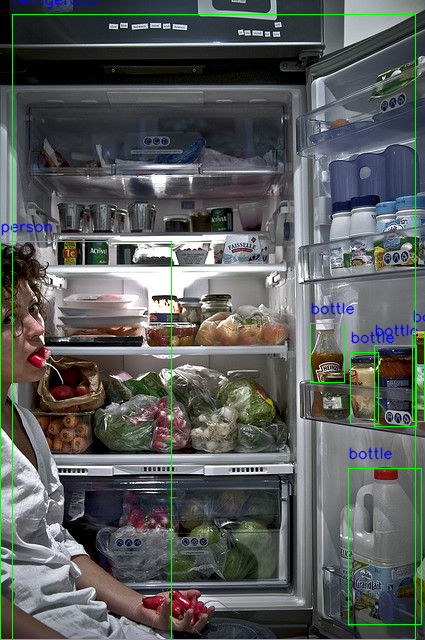

In [33]:
cv2_imshow(igg)